# Table of contents: <a id='back'></a>

* [Project description](#project_description)
* [Objective](#objective)
* [Initialization](#start)
     * [dataset review](#data_review)
     * [Data description](#data_description)
* [Data processing](#data_processing)
* [Definition of target variable and features](#target_and_features_definition)
     * [Variable distribution diagram](#data_distribution_diagram)
* [Data segmentation](#data_split)
* [Training models](#training_models)
     * [Classification decision tree model](#decision_tree_classifier)
         * [Model analysis](#model_analysis_1)
         * [Model Test](#model_test_1)
     * [Random forest classification model](#random_forest_classifier)
         * [Model analysis](#model_analysis_2)
         * [Model Test](#model_test_2)
     * [Logistic regression model](#logistic_regression)
         * [Model Test](#model_test_3)
* [Conclusions](#end)

# Project description <a id='project_description'></a>
Mobile company Megaline is not happy to see that many of its customers are using legacy plans. They want to develop a model that can analyze customer behavior and recommend one of Megaline's new plans: Smart or Ultra.

You have access to behavioral data for subscribers who have already switched to the new plans (from the Statistical Data Analysis course project). For this classification task you must create a model that chooses the correct plan. Since you have already done the step of processing the data, you can jump right into creating the model.

## Target: <a id='objective'></a>

Develop a model that can analyze customer behavior and recommend one of the new Megaline plans: Smart or Ultra. The model must be as *accurate* as possible. In this project, the *accuracy* threshold is 0.75. We will use the dataset to check *accuracy*.

## Initialization <a id='start'></a>
To start the project, we import the corresponding libraries and review the dataset delivered in the path: `dataset/users_behavior.csv`.

In [2]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #Dataset segmentation
from sklearn.tree import DecisionTreeClassifier # Decision trees
from sklearn.ensemble import RandomForestClassifier # Random forests
from sklearn.linear_model import LogisticRegression # Logistic regression
from sklearn.metrics import accuracy_score # Accuracy metric

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Load the dataset
#df = pd.read_csv(r'.\dataset\users_behavior.csv')  
df = pd.read_csv(r'datasets/users_behavior.csv') 

### Review of dataset <a id='data_review'></a>
Next, we will check if the dataset is clean and ready to work.

In [4]:
# Show general dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
# Mostrar las primeras filas del dataset
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [6]:
# Validate if there are missing values
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [7]:
# Validate if duplicate values exist
df.duplicated().sum()

0

The dataset has 5 columns with the corresponding data types and does not contain null or duplicate values.

### Data description <a id='data_description'></a>
Each observation in the dataset contains monthly behavior information about a user. The information given is the following:

- `сalls` – number of calls,
- `minutes` – total call duration in minutes,
- `messages` – number of text messages,
- `mb_used` – Internet traffic used in MB,
- `is_ultra` — plan for the current month (Ultra - 1, Smart - 0).

In [8]:
# Show the distribution of the data
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


According to the distribution, the following is observed:
- 'calls': The majority of users made a total of up to 6,200,000 calls and 25% of users made more than 8,200,000 calls.
- `minutes`: The majority of users consumed up to 430.600000 minutes in calls and 25% of users exceeded 571.927500 minutes.
- `messages`: The majority of users sent up to 30,000,000 text messages and 25% of users sent more than 57,000,000 messages.
- `mb_used`: The majority of users consumed up to 16943.235000 megabytes of internet and 25% of users exceeded 21424.700000 Mb, even reaching 49745.730000.
- `is_ultra`: More than 50% of users belong to the 'Smart' plan and approximately only 25% of customers have the 'Ultra' plan.

## Data processing <a id='data_processing'></a>
In that section, the data would be processed if there are observations regarding them; However, the data delivered is clean and ready to work on the training model, so we will move on to the next point.

## Definition of target variable and features <a id='target_and_features_definition'></a>
We define the training variables of the dataset.

- `target` is the target column: `is_ultra`. This column is classified into 1 and 0 depending on the type of Ultra and Smart plan, respectively.
- `features` is the set of data or characteristics: `calls`, `minutes`, `messages`, `mb_used`. This set of features will help us train the model.

In [111]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

### Target variable distribution diagram <a id='data_distribution_diagram'></a>
Next, we create some histograms to see the distribution of the target variable with respect to the other characteristics.

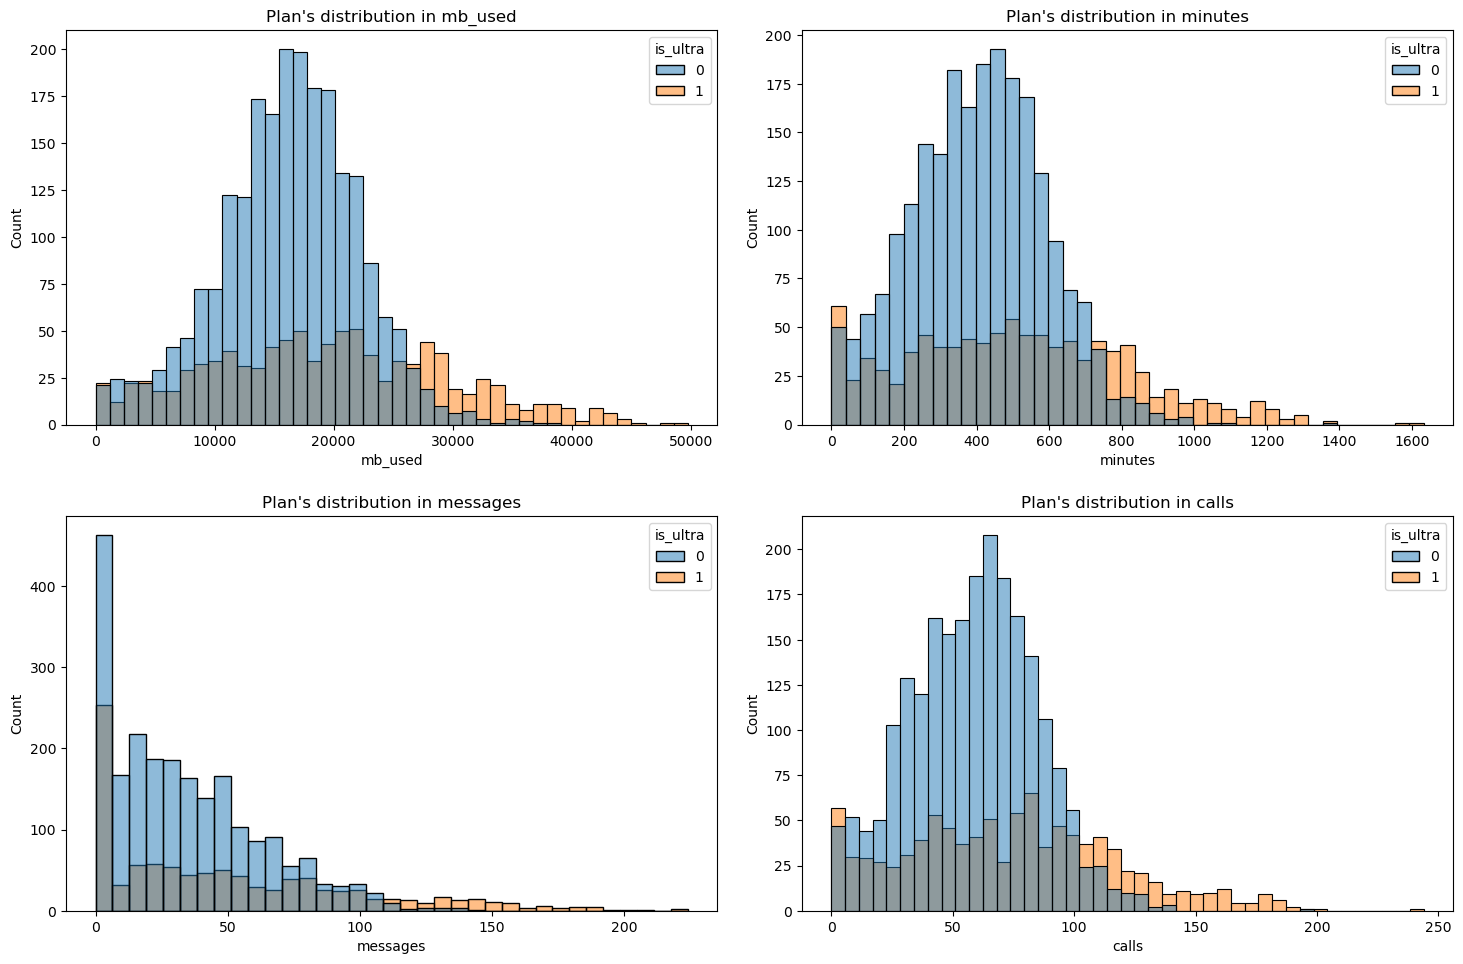

In [9]:
# Creamos unos histogramas 

features_list = ['mb_used', 'minutes', 'messages', 'calls']
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
for i, feature in enumerate(features_list): #range(len(features_list))
    ax.flatten()[i].set_title(f"Plan's distribution in {feature}")
    sns.histplot(x=df[features_list[i]], hue=df['is_ultra'],ax=ax.flatten()[i])

fig.tight_layout(pad=2.0)

The graphs show that the majority of users are from the 'Smart' plan: however, there are values that begin to delimit the 'Ultra' users:
- Starting at 263,000 megabytes used (`mb_used`), the majority of users are on the 'Ultra' plan.
- In the case of minutes, it is observed that, when the minutes are greater than 700, they are mostly from the 'Ultra' plan.
- For messages and calls, when the number is around 100 or more, users are on the 'Ultra' plan.

## Data segmentation <a id='data_split'></a>
In this section, we will segment the data set into 3 parts: training set, validation set and test set. This is done to improve the quality of training and avoid possible overfitting.

These sets will be divided with the following distribution respectively: 0.6, 0.2, 0.2. This way, we have a larger set for training the model and save 2 portions for validation and testing.

In [112]:
# We divide the data into training sets and 40% into a temporary set
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)

# Divide the temporary data into validation and test sets in proportion of 20% for each set.
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

The data was segmented as follows:
- features_train = 1928
- target_train = 1928

- features_valid = 643
- target_valid = 643

- features_test = 643
- target_test = 643

## Training models <a id='training_models'></a>
Next, we will perform the classification training with 3 different models to find the best model that has the highest accuracy, these are:
- Decision trees for classification
- Alatory forests for classification
- Logistic regression

### Classification decision tree model <a id='decision_tree_classifier'></a>
First, we try the decision tree classification model where we will validate the accuracy of the model with a data set different from the training data set.
To do this, in a `for` loop we will test the value of the hyper parameter `max_depth` to find the value that has the best accuracy and thus, have the best training model.

In [161]:
# We create the training model

best_model_dt = None
best_result_dt = 0
for depth in range(1, 11):
	model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth) # creates a model with the given depth
	model_dt.fit(features_train,target_train) # train the model
	predictions_dt = model_dt.predict(features_valid) # get model predictions
	result_dt = accuracy_score(target_valid,predictions_dt) # calculate accuracy
	print("Profundidad:", depth, "- Exactitud del modelo en el conjunto de validacion:", result_dt)
	
	if result_dt > best_result_dt:
		best_model_dt = model_dt
		best_result_dt = result_dt
		best_depth = depth
	     
print(f"\nExactitud del mejor modelo en el conjunto de validacion (depth = {best_depth}):", best_result_dt)


Profundidad: 1 - Exactitud del modelo en el conjunto de validacion: 0.7542768273716952
Profundidad: 2 - Exactitud del modelo en el conjunto de validacion: 0.7822706065318819
Profundidad: 3 - Exactitud del modelo en el conjunto de validacion: 0.7853810264385692
Profundidad: 4 - Exactitud del modelo en el conjunto de validacion: 0.7791601866251944
Profundidad: 5 - Exactitud del modelo en el conjunto de validacion: 0.7791601866251944
Profundidad: 6 - Exactitud del modelo en el conjunto de validacion: 0.7838258164852255
Profundidad: 7 - Exactitud del modelo en el conjunto de validacion: 0.7822706065318819
Profundidad: 8 - Exactitud del modelo en el conjunto de validacion: 0.7791601866251944
Profundidad: 9 - Exactitud del modelo en el conjunto de validacion: 0.7822706065318819
Profundidad: 10 - Exactitud del modelo en el conjunto de validacion: 0.7744945567651633

Exactitud del mejor modelo en el conjunto de validacion (depth = 3): 0.7853810264385692


After training the model, it shows us that the model trained with a depth of 3 gives us the best accuracy of 78.5%

#### Model analysis <a id='model_analysis_1'></a>
Next, we graph the model to visualize the decision cuts of the characteristics at a depth of 3 because, with this value of the `max_depth` hyperparameter, the best model was found.

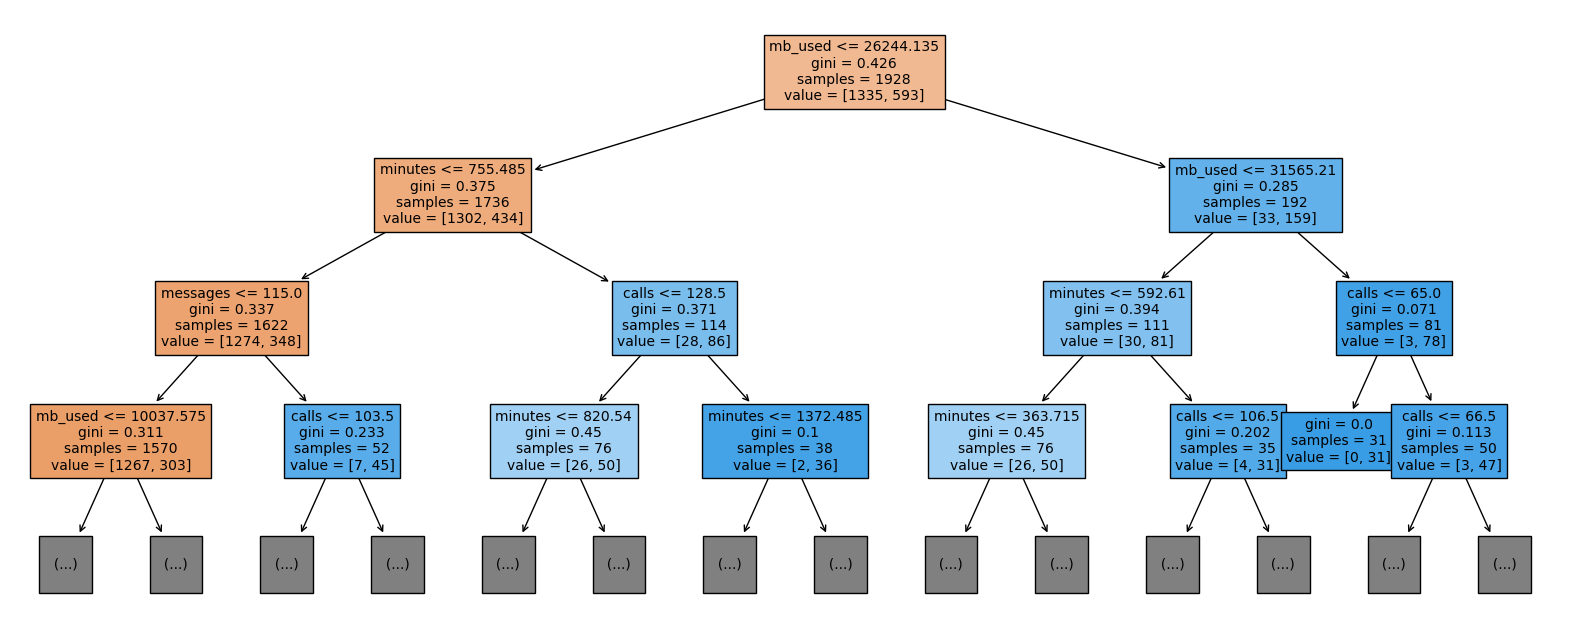

In [175]:
plt.figure(figsize=(20,8))
plot_tree(decision_tree=model_dt,max_depth=3 ,feature_names=features_train.columns, filled=True,fontsize=10);

It is observed that the main characteristic in which the first cut occurred was `mb_used` with an approximate value of 263000 where it began to classify the type of plan used and so on with other characteristics. This aligns with the previous point where the distribution of the data in the histograms was shown.

#### Model test <a id='model_test_1'></a>
Next, we test the model on the test set we have reserved and will compare the correct values with the result of the predictions.

In [179]:
# We test the model on the test set
test_predictions_dt = model_dt.predict(features_test)

In [180]:
# We calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(target_test,test_predictions_dt)
print (f'Exactitud del modelo en el conjunto de prueba: {test_accuracy}')
print('Predicciones (%):', test_predictions_dt.sum()/test_predictions_dt.shape[0])
print('Respuestas correctas (%):', target_test.sum()/target_test.shape[0])


Exactitud del modelo en el conjunto de prueba: 0.7884914463452566
Predicciones (%): 0.2286158631415241
Respuestas correctas (%): 0.3157076205287714


The classification performed with the classification training model **decision trees** resulted in an accuracy of **`78.85%`**.

### Random forest classification model <a id='random_forest_classifier'></a>
We create a random forest classification model where we will validate the accuracy of the model with a data set different from the training data set.
To do this, in a `for` loop we will test the value of the hyper parameter `n_estimators` to find the value that has the best accuracy and thus, have the best training model.

In [169]:

# We create the training model
best_score_rf = 0
best_est_rf = 0
for est in range(1,101): # select the range of the hyperparameter
    model_rf = RandomForestClassifier(random_state=54321, n_estimators=est) # configure the number of trees (n_estimators)
    model_rf.fit(features_train,target_train) # train the model on the training set
    score_rf = model_rf.score(features_valid,target_valid) # Call the predict() method internally and calculate the accuracy score on the validation set
    print("(n_estimators = {}) - Accuracy del mejor modelo en el conjunto de validación: {}".format(est, score_rf))
    if score_rf > best_score_rf:
        best_score_rf = score_rf # save the best accuracy score to the validation set
        best_est_rf = est # saves the number of estimators that correspond to the best accuracy score

print("Accuracy del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est_rf, best_score_rf))

#final_model = RandomForestClassifier(random_state=54321, n_estimators=6)
#final_model.fit(features_train, target_train)

(n_estimators = 1) - Accuracy del mejor modelo en el conjunto de validación: 0.6936236391912908
(n_estimators = 2) - Accuracy del mejor modelo en el conjunto de validación: 0.749611197511664
(n_estimators = 3) - Accuracy del mejor modelo en el conjunto de validación: 0.7527216174183515
(n_estimators = 4) - Accuracy del mejor modelo en el conjunto de validación: 0.7542768273716952
(n_estimators = 5) - Accuracy del mejor modelo en el conjunto de validación: 0.744945567651633
(n_estimators = 6) - Accuracy del mejor modelo en el conjunto de validación: 0.7573872472783826
(n_estimators = 7) - Accuracy del mejor modelo en el conjunto de validación: 0.7636080870917574
(n_estimators = 8) - Accuracy del mejor modelo en el conjunto de validación: 0.7744945567651633
(n_estimators = 9) - Accuracy del mejor modelo en el conjunto de validación: 0.7620528771384136
(n_estimators = 10) - Accuracy del mejor modelo en el conjunto de validación: 0.7791601866251944
(n_estimators = 11) - Accuracy del mejor 

#### Model analysis <a id='model_analysis_2'></a>
Next, in a bar diagram we order the characteristics according to their importance within the randomness forest. In this graph, it is observed that the most important characteristic is `mb_used` with 35% importance and the least important is `messages` with 20%.

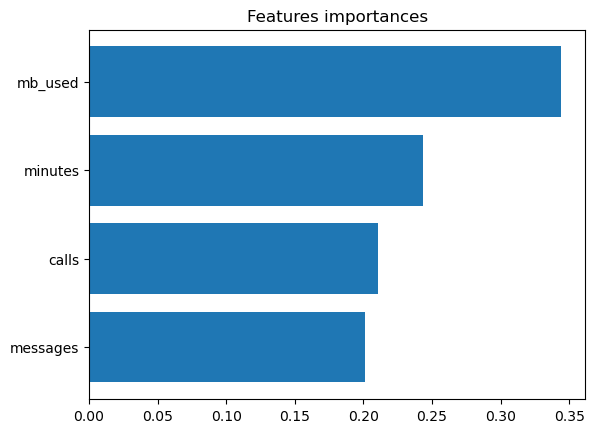

In [185]:
features_rf = df.columns
importances = model_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Features importances')
plt.barh(range(len(indices)),importances[indices], align='center')
plt.yticks(range(len(indices)),[features_rf[i] for i in indices])
plt.show()

#### Model test <a id='model_test_2'></a>
Next, we test the model on the test set we separated above.

In [171]:
#test_score_rf = model_rf.score(features_test,target_test)
test_predictions_rf = model_rf.predict(features_test) # get model predictions
test_accuracy_rf = accuracy_score(target_test,test_predictions_rf)

print (f'Exactitud del modelo en el conjunto de prueba: {test_accuracy_rf}')
print('Predicciones (%):', test_predictions_rf.sum()/test_predictions_rf.shape[0])
print('Respuestas correctas (%):', target_test.sum()/target_test.shape[0])

Exactitud del modelo en el conjunto de prueba: 0.7869362363919129
Predicciones (%): 0.2581648522550544
Respuestas correctas (%): 0.3157076205287714


Finally, the classification performed with the classification training model **random forests** resulted in an accuracy of **`78.70%`**.

### Logistic regression model <a id='logistic_regression'></a>
We create a logistic regression classification model where we will validate the accuracy of the model with a data set different from the training data set.

In [186]:
# We create the training model

model_lr = LogisticRegression(random_state=54321, solver='liblinear')# initialize the logistic regression constructor with the parameters random_state=54321 and solver='liblinear'
model_lr.fit(features_train,target_train) # train the model on the training set
score_train_lr = model_lr.score(features_train,target_train) # calculate the accuracy score on the training set
score_valid_lr = model_lr.score(features_valid,target_valid) # calculate the accuracy score on the validation set

print("Accuracy del modelo de regresión logística en el conjunto de entrenamiento:", score_train_lr)
print("Accuracy del modelo de regresión logística en el conjunto de validación:", score_valid_lr)

Accuracy del modelo de regresión logística en el conjunto de entrenamiento: 0.7152489626556017
Accuracy del modelo de regresión logística en el conjunto de validación: 0.7076205287713841


#### Model test <a id='model_test_3'></a>
Next, we test the model on the test set we separated above.

In [187]:
test_predictions_lr = model_lr.predict(features_test) # get model predictions
test_accuracy_lr = accuracy_score(target_test,test_predictions_lr)

print (f'Exactitud del modelo en el conjunto de prueba: {test_accuracy_lr}')
print('Predicciones (%):', test_predictions_lr.sum()/test_predictions_lr.shape[0])
print('Respuestas correctas (%):', target_test.sum()/target_test.shape[0])

Exactitud del modelo en el conjunto de prueba: 0.6905132192846034
Predicciones (%): 0.01866251944012442
Respuestas correctas (%): 0.3157076205287714


The classification performed with the training model **logistic regression** resulted in an accuracy of **`69%`**.

## Conclusions <a id='end'></a>
 
1. In the initialization stage of the project, the data delivered was reviewed where it was observed that the data was ready without needing any type of processing to be carried out.
2. Next, the data was prepared by identifying the variables: features and target.
3. After that, the data was segmented into different sets with 3 sizes in order to have 3 datasets: training, validation and testing; The distribution was 0.6, 0.2 and 0.2, respectively.
4. 3 classification models were trained and tested to find the model with the greatest possible accuracy, the test results were as follows:
- Decision trees: 78.85% accuracy.
- Randomness forests: 78.7% accuracy.
- Logistic regression: 69% accuracy.
5. Finally, the model with the greatest accuracy identified was: **Decision trees.**